<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Elastic_Net_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elastic Net Regression Model

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
bstn = load_boston()
bstn.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
df = bstn.data
df

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
print(bstn['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
df = pd.DataFrame(data = bstn.data, columns = bstn.feature_names)
df['Price'] = bstn.target * 1000
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


In [7]:
data = df.drop(columns=['Price'])
target = df.Price

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=.15, random_state=1,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((430, 13), (430,), (76, 13), (76,))

In [9]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train[data.columns] = scaler.fit_transform(X_train[data.columns])
# X_test[data.columns] = scaler.transform(X_test[data.columns])

In [10]:
from sklearn.linear_model import (
    ElasticNet,
)
from sklearn.model_selection import (
    KFold,
    cross_validate,
)
from sklearn.metrics import r2_score

In [11]:
enet_model = ElasticNet(alpha=1, l1_ratio=.5)
enet_model.fit(X_train, y_train)

ElasticNet(alpha=1)

In [12]:
train_score = enet_model.score(X_train, y_train).round(3) * 100
train_score

70.0

In [13]:
test_score = enet_model.score(X_test, y_test).round(3) * 100

In [14]:
test_score

69.69999999999999

In [15]:
y_pred = enet_model.predict(X_test)

r_score = r2_score(y_test, y_pred).round(3) * 100
r_score

69.69999999999999

In [16]:
coef = pd.DataFrame()
coef['columns'] = X_train.columns
coef['coefficient_estimate'] = pd.Series(enet_model.coef_)

coef

,columns,coefficient_estimate
0,CRIM,-104.186273
1,ZN,64.851706
2,INDUS,-72.105176
3,CHAS,311.852922
4,NOX,-102.300329
5,RM,1274.638938
6,AGE,16.969950
7,DIS,-1018.275011
8,RAD,328.833023
9,TAX,-15.187153


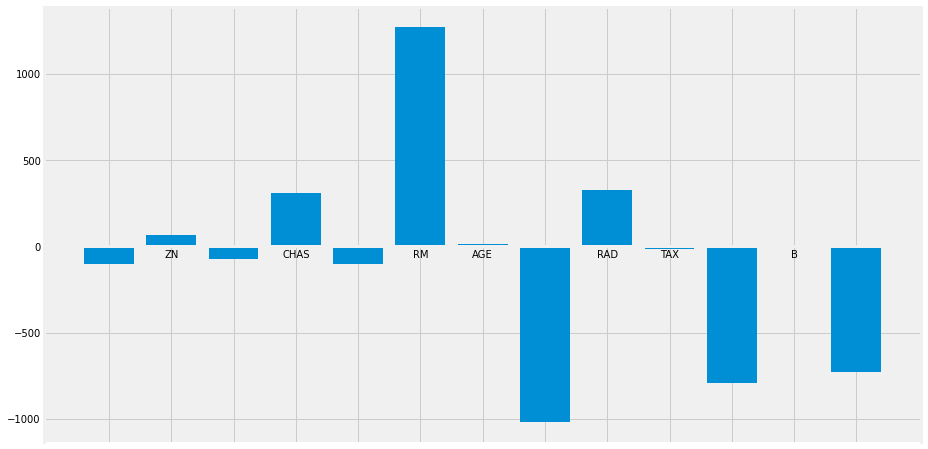

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(
      coef['columns'],
      coef['coefficient_estimate']
      )
ax.spines['bottom'].set_position('zero')